<a href="https://colab.research.google.com/github/Pongpang-2102/Text_Minig_and_Sentiment_Analytics_KDAI_projects/blob/main/KDAI_Tutorial_TMSA_CNN_Sentiment101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 32.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
Model = tf.keras.models.Model
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
load_model = tf.keras.models.load_model

import pandas as pd
import re
from pythainlp.tokenize import word_tokenize, Tokenizer
KRTokenizer = tf.keras.preprocessing.text.Tokenizer

pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GRU, LSTM, Bidirectional, Embedding, Dropout, BatchNormalization
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import ModelCheckpoint

# from tensorflow.keras.optimizers import Adam

import seaborn as sn
import matplotlib.pyplot as plt

import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import string
# from os import listdir
from string import punctuation
# from os import listdir

#########################
from pythainlp.tokenize import word_tokenize #, Tokenizer
from pythainlp.corpus.common import thai_words

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pythainlp.corpus import thai_stopwords

from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
#os.chdir('drive/MyDrive/Sentiment Analysis Workshop')

In [ ]:
#ls

In [ ]:
train_input = "/content/drive/MyDrive/# KDAI_TextMining/Sentiment 060823/train.txt"
train_label = "/content/drive/MyDrive/# KDAI_TextMining/Sentiment 060823/train_label.txt"

In [ ]:
EPOCHS = 100
BS = 32
DIMENSION = 256

In [ ]:
comments = []
labels = []

with open(train_input,encoding="utf-8") as f:
    for line in f:
        comments.append(line.strip())

with open(train_label,encoding="utf-8") as f:
    for line in f:
        labels.append(line.strip())

In [ ]:
df = pd.DataFrame({ "category": labels, "comments": comments })
df.head()

,category,comments
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1,neu,คะ
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค
3,neu,😅😅😅
4,neu,สวัสดีวันพุธ แนน อะไรนะ


In [ ]:
df = df.drop_duplicates()

In [ ]:
neu_df = df[df.category == "neu"].sample(4300)
neu_df.head()

,category,comments
1938,neu,อย่าซื้อเฟร่นฟายแมคตอนลด50% มันอ้วน😖😖
14174,neu,ก็เอาแสงโสมงัย
20120,neu,คนไทยต้องสูบให้ตาย จะสนใจอะไร เงินมาก่อน
23299,neu,สาธุค่ะ
14882,neu,เลิกงานไปเลย จ่ายด้วย


In [ ]:
pos_df = df[df.category == "pos"]
pos_df.head()

,category,comments
10,pos,สนใจ ฟอจูนเนอร์ สีขาวครับ
16,pos,ไปดิ..รอไร
19,pos,อยากกินบาบีก้อนหรอ555555
22,pos,ต้องไปลองกันนะ
25,pos,ขอให้ SHEENe มีกิจการรุ่งเรือง ขายดีๆ ยอดไลท์เ...


In [ ]:
neg_df = df[df.category == "neg"].sample(4300)
neg_df.head()

,category,comments
16747,neg,เป็นฉากจบที่เหี้ย เอาตามตรงคือกูไม่น่าอ่านเรื่...
1415,neg,กุก็ไม่กินปะ55555
21426,neg,ไม่ต้องแดกเลยทีนี้
16476,neg,กูไม่แดกอยู่ดี ไม่แดกเนื้อ5555
10493,neg,ทำไมแม็คโดนัลด์มันแพงจัง


In [ ]:
sentiment_df = pd.concat([neg_df, pos_df])
sentiment_df.head()

,category,comments
16747,neg,เป็นฉากจบที่เหี้ย เอาตามตรงคือกูไม่น่าอ่านเรื่...
1415,neg,กุก็ไม่กินปะ55555
21426,neg,ไม่ต้องแดกเลยทีนี้
16476,neg,กูไม่แดกอยู่ดี ไม่แดกเนื้อ5555
10493,neg,ทำไมแม็คโดนัลด์มันแพงจัง


In [ ]:
sentiment_df['clean_comments'] = sentiment_df['comments'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,category,comments,clean_comments
16747,neg,เป็นฉากจบที่เหี้ย เอาตามตรงคือกูไม่น่าอ่านเรื่...,เป็นฉากจบที่เหี้ย เอาตามตรงคือกูไม่น่าอ่านเรื่...
1415,neg,กุก็ไม่กินปะ55555,กุก็ไม่กินปะ55555
21426,neg,ไม่ต้องแดกเลยทีนี้,ไม่ต้องแดกเลยทีนี้
16476,neg,กูไม่แดกอยู่ดี ไม่แดกเนื้อ5555,กูไม่แดกอยู่ดี ไม่แดกเนื้อ5555
10493,neg,ทำไมแม็คโดนัลด์มันแพงจัง,ทำไมแม็คโดนัลด์มันแพงจัง


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].str.replace(r'[%s]' % (pun), '', regex=True)

In [ ]:
sentiment_df.sample(5)

,category,comments,clean_comments
3055,pos,มันจะทำร้ายสักหน่อยนะคะ เทเวศน์ ข้างเซเว่นตรงข...,มันจะทำร้ายสักหน่อยนะคะ เทเวศน์ ข้างเซเว่นตรงข...
12518,pos,ทำไมชอบชวนกินๆๆตลอด,ทำไมชอบชวนกินๆๆตลอด
22147,neg,อีกละ,อีกละ
16469,neg,โปรนี้เหมือนโปร 299 แต่บังคับให้ไป 4 คน โปร 29...,โปรนี้เหมือนโปร 299 แต่บังคับให้ไป 4 คน โปร 29...
2918,neg,บ้าไปแล้ววววววเจ้าหน้าที่.......,บ้าไปแล้ววววววเจ้าหน้าที่


In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62068

In [ ]:
text = "โอเคบ่พวกเรารักภาษาบ้านเกิด"

In [ ]:
custom_tokenizer = Tokenizer(custom_words_list)
custom_tokenizer.word_tokenize(text)

['โอเค', 'บ่', 'พวกเรา', 'รัก', 'ภาษา', 'บ้านเกิด']

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,category,comments,clean_comments
18713,neg,ไปๆ กลับกรุงเทพไปเดอะเฟสชอปเลย เล็บผมที่บอกจะท...,"[ไป, ๆ, , กลับ, กรุงเทพ, ไป, เดอะ, เฟส, ชอป, ..."
18857,pos,ทุกวันนี้ดื่มน้ำ สิงห์ค่ะพูด //การตลาดถูกใจมาก,"[ทุกวันนี้, ดื่ม, น้ำ, , สิงห์, ค่ะ, พูด, , ..."
2952,pos,ผมมีstarexแล้วคับ เล็งcx3ไว้ในเมือง จริงๆสนมาส...,"[ผม, มี, starex, แล้ว, คับ, , เล็ง, cx, 3, ไว..."
3538,neg,เข้าคสามรู้สึกเลยเหมือนนี่ที่แพ้กานิเย่​ และอื...,"[เข้า, ค, สาม, รู้สึก, เลย, เหมือน, นี่, ที่, ..."
1728,pos,สามีอยากไปกิน,"[สามี, อยาก, ไป, กิน]"


In [ ]:
tokenized_doc = sentiment_df['clean_comments']
tokenized_doc[:10]

16747    [เป็น, ฉาก, จบ, ที่, เหี้ย,  , เอา, ตามตรง, คื...
1415                         [กุ, ก็, ไม่, กิน, ปะ, 55555]
21426                           [ไม่ต้อง, แดก, เลย, ทีนี้]
16476     [กู, ไม่, แดก, อยู่ดี,  , ไม่, แดก, เนื้อ, 5555]
10493                 [ทำไม, แม็ค, โดนัลด์, มัน, แพง, จัง]
11323    [ใช่,  , วันนั้น, ไป, ซื้อ, รองพื้น, เลฟ, ลอน,...
3690     [เปลี่ยนเป็น, อย่าง, อื่น, ได้, เปล่า,  , ที่,...
7240                                         [แรง, ชิบหาย]
2924               [ขาย, อัลติส, ทิ้ง, ซื้อ, ฟอร์ด, โฟกัส]
19394       [ซื้อ, ยาก, มาก, ค่ะ,  , แอ, ฟ, เด้ง, ตลอด, ๆ]
Name: clean_comments, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

16747    [เป็น, ฉาก, จบ, ที่, เหี้ย,  , เอา, ตามตรง, คื...
1415                         [กุ, ก็, ไม่, กิน, ปะ, 55555]
21426                           [ไม่ต้อง, แดก, เลย, ทีนี้]
16476     [กู, ไม่, แดก, อยู่ดี,  , ไม่, แดก, เนื้อ, 5555]
10493                 [ทำไม, แม็ค, โดนัลด์, มัน, แพง, จัง]
11323    [ใช่,  , วันนั้น, ไป, ซื้อ, รองพื้น, เลฟ, ลอน,...
3690     [เปลี่ยนเป็น, อย่าง, อื่น, ได้, เปล่า,  , ที่,...
7240                                         [แรง, ชิบหาย]
2924               [ขาย, อัลติส, ทิ้ง, ซื้อ, ฟอร์ด, โฟกัส]
19394       [ซื้อ, ยาก, มาก, ค่ะ,  , แอ, ฟ, เด้ง, ตลอด, ๆ]
Name: clean_comments, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
#     print(tokenized_doc[i])
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

sentiment_df['clean_comments'] = detokenized_doc

In [ ]:
sentiment_df.head()

,category,comments,clean_comments
16747,neg,เป็นฉากจบที่เหี้ย เอาตามตรงคือกูไม่น่าอ่านเรื่...,เป็น ฉาก จบ ที่ เหี้ย เอา ตามตรง คือ กู ไม่ ...
1415,neg,กุก็ไม่กินปะ55555,กุ ก็ ไม่ กิน ปะ 55555
21426,neg,ไม่ต้องแดกเลยทีนี้,ไม่ต้อง แดก เลย ทีนี้
16476,neg,กูไม่แดกอยู่ดี ไม่แดกเนื้อ5555,กู ไม่ แดก อยู่ดี ไม่ แดก เนื้อ 5555
10493,neg,ทำไมแม็คโดนัลด์มันแพงจัง,ทำไม แม็ค โดนัลด์ มัน แพง จัง


In [ ]:
cleaned_words = sentiment_df['clean_comments'].to_list()

In [ ]:
cleaned_words[:1]

['เป็น ฉาก จบ ที่ เหี้ย   เอา ตามตรง คือ กู ไม่ น่าอ่าน เรื่อง นี้ เลย อะ   อ่าน มา ครึ่ง ตอน ว่า จะ ไม่ อ่าน ต่อ เพราะ หลอน   แต่ ด้วย ความ ขี้ เสือก ของ กู ก็ แม่ ง ต้อง จำใจ อ่าน ต่อ อะ   แล้ว กู ก็ กลายเป็น คน มีอคติ กะ อิ เพลง จัทร์ เอ๋ย จันทร์ เจ้า   เพิ่ง อ่าน จบ มา หมาดๆ   เกร็ง ไป หมด ไม่ กล้า ขยับ อะ   กู ไม่ กล้า ไป ข รี้ !!!   ดอกไม้ ราตรี']

In [ ]:
def create_tokenizer(words, filters = ''):
    token = KRTokenizer()
    token.fit_on_texts(words)
    return token

In [ ]:
train_word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(train_word_tokenizer.word_index) + 1

train_word_tokenizer.word_index

{'ไม่': 1,
 'ไป': 2,
 'เลย': 3,
 'ที่': 4,
 'มา': 5,
 'ได้': 6,
 'ก็': 7,
 'มี': 8,
 'กิน': 9,
 'จะ': 10,
 'ๆ': 11,
 'แล้ว': 12,
 'แต่': 13,
 'มาก': 14,
 'ครับ': 15,
 'ให้': 16,
 'ว่า': 17,
 'ค่ะ': 18,
 'เป็น': 19,
 'ของ': 20,
 'มัน': 21,
 'นะ': 22,
 'นี้': 23,
 'อยาก': 24,
 'ใช้': 25,
 'ดี': 26,
 'กับ': 27,
 'คือ': 28,
 'ใน': 29,
 'เรา': 30,
 'และ': 31,
 'ต้อง': 32,
 'รถ': 33,
 'คน': 34,
 'ชอบ': 35,
 'ด้วย': 36,
 'ยัง': 37,
 'กว่า': 38,
 'กัน': 39,
 'นี่': 40,
 'ถ้า': 41,
 'อีก': 42,
 'ละ': 43,
 'กก': 44,
 'ผม': 45,
 'เพราะ': 46,
 'เอา': 47,
 'กู': 48,
 'แบบ': 49,
 'ซื้อ': 50,
 'ทำ': 51,
 'อะไร': 52,
 'อยู่': 53,
 'แม่': 54,
 'ง': 55,
 'เบียร์': 56,
 'บอก': 57,
 '2': 58,
 'อะ': 59,
 'ดู': 60,
 'แพง': 61,
 'ก้อน': 62,
 'เคย': 63,
 'พอ': 64,
 'สวย': 65,
 'ช้าง': 66,
 'หมด': 67,
 'แค่': 68,
 'อร่อย': 69,
 'เหมือน': 70,
 'พี่': 71,
 'ตัว': 72,
 'เห็น': 73,
 'วัน': 74,
 'หน้า': 75,
 'อ่ะ': 76,
 'อย่าง': 77,
 'จาก': 78,
 'ลอง': 79,
 'ราคา': 80,
 'แดก': 81,
 'ไหน': 82,
 'การ': 83,
 '3': 84,


In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

506

In [ ]:
def encoding_doc(token, words):
    return(token.texts_to_sequences(words))

In [ ]:
encoded_doc = encoding_doc(train_word_tokenizer, cleaned_words)

In [ ]:
print(cleaned_words[6])
print(encoded_doc[6])

เปลี่ยนเป็น อย่าง อื่น ได้ เปล่า   ที่ ไม่ ใช่ แสง โสมม มม 555555
[1834, 77, 243, 6, 1544, 4, 1, 87, 843, 4892, 1364, 348]


In [ ]:
def padding_doc(encoded_doc, max_length):
   return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [ ]:
padded_doc = padding_doc(encoded_doc, max_length)
print("Shape of padded docs = ",padded_doc.shape)

Shape of padded docs =  (8600, 506)


In [ ]:
print(cleaned_words[200])
print(encoded_doc[200])
print(padded_doc[200])

จะ กิน ต้อง ใช้ บัตร เรื่อง เยอะ
[10, 9, 32, 25, 281, 115, 89]
[ 10   9  32  25 281 115  89   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [ ]:
category = sentiment_df['category'].to_list()

In [ ]:
unique_category = list(set(category))
unique_category

['neg', 'pos']

In [ ]:
output_tokenizer = create_tokenizer(unique_category)

In [ ]:
encoded_output = encoding_doc(output_tokenizer, category)
print(category[6000:6002])
print(encoded_output[6000:6002])

['pos', 'pos']
[[2], [2]]


In [ ]:
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)
encoded_output.shape

(8600, 1)

In [ ]:
def one_hot(encode):
  oh = OneHotEncoder(sparse = False)
  return(oh.fit_transform(encode))

In [ ]:
output_one_hot = one_hot(encoded_output)
print(encoded_output[0])
print(output_one_hot[0])

[1]
[1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, output_one_hot, shuffle = True, test_size = 0.2, stratify=output_one_hot)

In [ ]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

Shape of train_X = (6880, 506) and train_Y = (6880, 2)
Shape of val_X = (1720, 506) and val_Y = (1720, 2)


In [ ]:
num_classes = len(unique_category)

In [ ]:
num_classes

2

In [ ]:
# from tensorflow.keras.optimizers import Adam
# adam = Adam(learning_rate=0.0001)


from tensorflow.keras.optimizers.legacy import Adam
adam = Adam(learning_rate=0.0001)

In [ ]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = tf.keras.layers.Input(shape=(length,))
    embedding1 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs1)
    conv1 = tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = tf.keras.layers.Dropout(0.5)(conv1)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop1)
    flat1 = tf.keras.layers.Flatten()(pool1)
    # channel 2
    inputs2 = tf.keras.layers.Input(shape=(length,))
    embedding2 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs2)
    conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = tf.keras.layers.Dropout(0.5)(conv2)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
    flat2 = tf.keras.layers.Flatten()(pool2)
    # channel 3
    inputs3 = tf.keras.layers.Input(shape=(length,))
    embedding3 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs3)
    conv3 = tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = tf.keras.layers.Dropout(0.5)(conv3)
    pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop3)
    flat3 = tf.keras.layers.Flatten()(pool3)
    # merge
    merged = tf.keras.layers.concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = tf.keras.layers.Dense(10, activation='relu')(merged)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # summarize
    print(model.summary())
#     plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
model = define_model(max_length, vocab_size)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 506, 256)     3341056     ['input_1[0][0]']                
                                                                                              

In [ ]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [checkpoint, learning_rate_reduction]

In [ ]:
hist = model.fit([train_X, train_X, train_X], train_Y, epochs = EPOCHS, batch_size = BS, validation_data = ([val_X, val_X, val_X], val_Y), callbacks = [callbacks_list], shuffle=True)

Epoch 1/100
212/215 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.4975
Epoch 1: val_loss improved from inf to 0.69315, saving model to model.h5
215/215 [==============================] - 15s 23ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000
Epoch 2: val_loss did not improve from 0.69315
215/215 [==============================] - 4s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
214/215 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.4942
Epoch 3: val_loss improved from 0.69315 to 0.69315, saving model to model.h5
215/215 [==============================] - 4s 18ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/100
213/215 [============================>.] - ETA: 0s -

In [ ]:
h1 = go.Scatter(y=hist.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
predict_model = load_model(filename)
predict_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 506, 256)     3341056     ['input_1[0][0]']                
                                                                                              

In [ ]:
score = predict_model.evaluate([val_X, val_X, val_X], val_Y, verbose=0)
print('Validate loss:', score[0])
print('Validate accuracy:', score[1])

Validate loss: 0.43039828538894653
Validate accuracy: 0.819767415523529


In [ ]:
predicted_classes = np.argmax(predict_model.predict([val_X, val_X, val_X]), axis=-1)
predicted_classes.shape

54/54 [==============================] - 0s 4ms/step


(1720,)

In [ ]:
y_true = np.argmax(val_Y,axis = 1)
print(val_Y[0])
print(y_true[0])

[1. 0.]
0


In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")

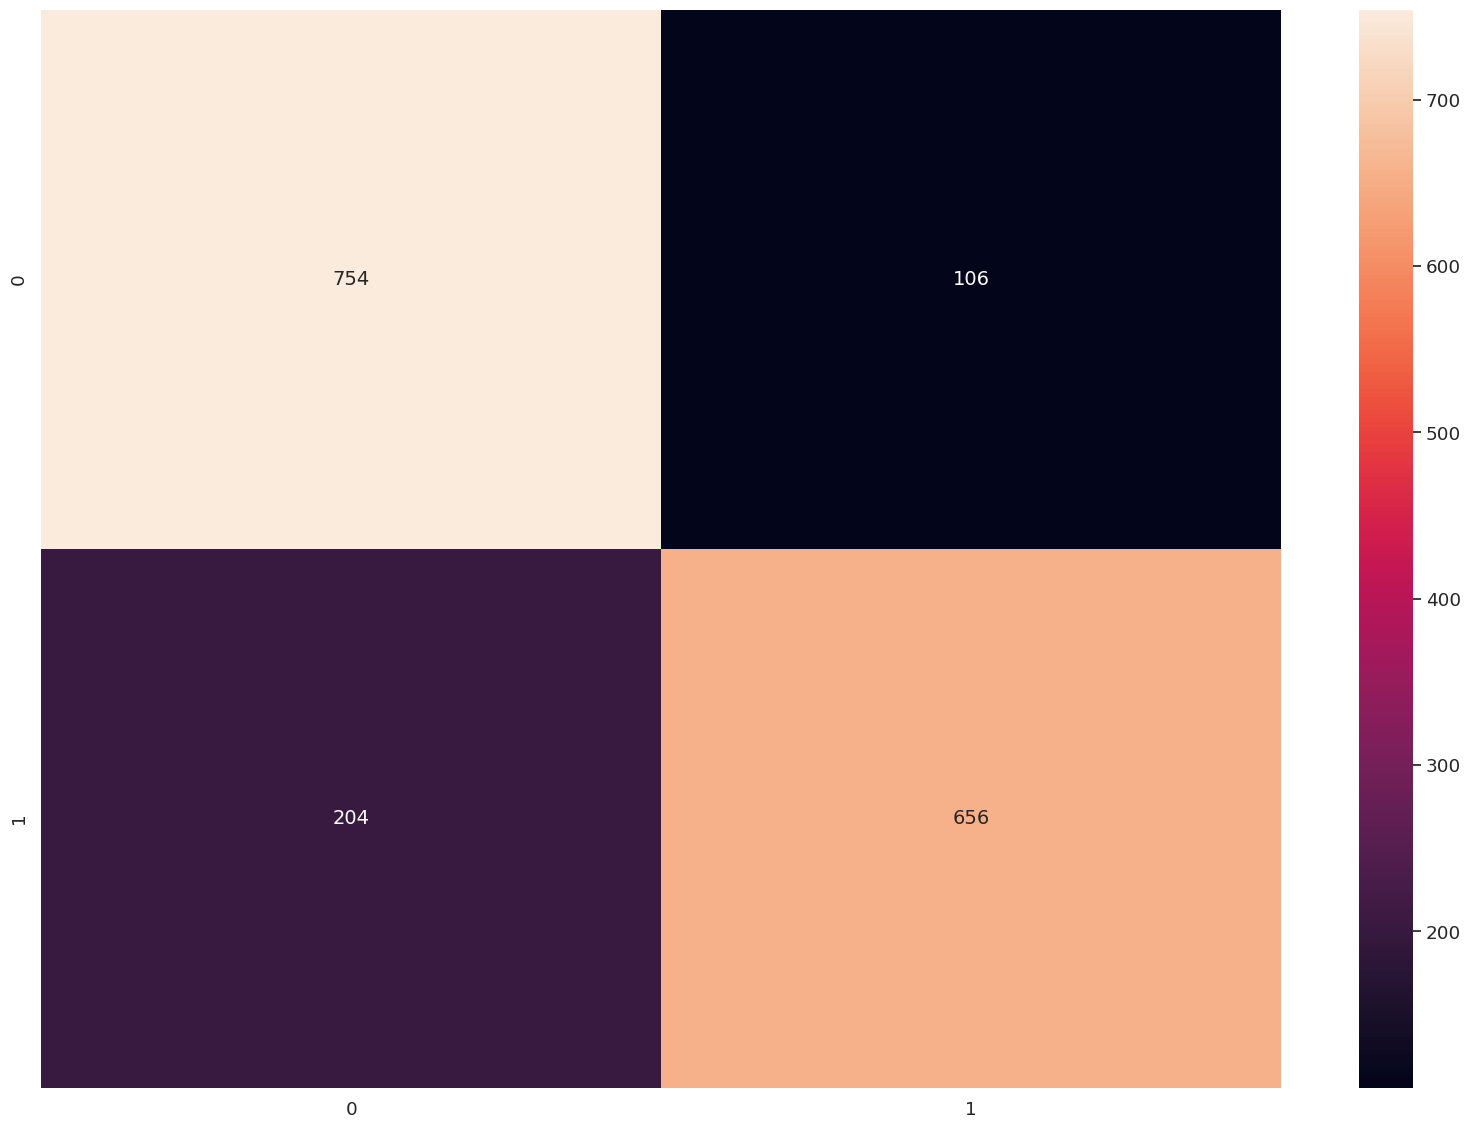

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
label_dict = output_tokenizer.word_index

In [ ]:
label = [key for key, value in label_dict.items()]

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=label, digits=4))

              precision    recall  f1-score   support

         neg     0.7871    0.8767    0.8295       860
         pos     0.8609    0.7628    0.8089       860

    accuracy                         0.8198      1720
   macro avg     0.8240    0.8198    0.8192      1720
weighted avg     0.8240    0.8198    0.8192      1720



# **CNN Model for Sentiment Analysis using Word Embedding from Gensim ⬇**

In [ ]:
sentences = [st.split() for st in cleaned_words]

In [ ]:
w2v_model = Word2Vec(sentences, min_count=1, vector_size=DIMENSION, workers=6, sg=1, epochs=500)

In [ ]:
w2v_model.save('w2v_model.bin')

In [ ]:
new_model = Word2Vec.load('w2v_model.bin')

In [ ]:
embedding_matrix = np.zeros((vocab_size, DIMENSION))

for word, i in train_word_tokenizer.word_index.items():
    if word in new_model.wv.index_to_key:
        embedding_vector = new_model.wv[word]
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape, DIMENSION, vocab_size

((13051, 256), 256, 13051)

In [ ]:
# define the model
def define_w2v_model(length, vocab_size, embedding_matrix):
    # channel 1
    inputs1 = tf.keras.layers.Input(shape=(length,))
    embedding1 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs1)
    conv1 = tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = tf.keras.layers.Dropout(0.5)(conv1)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop1)
    flat1 = tf.keras.layers.Flatten()(pool1)
    # channel 2
    inputs2 = tf.keras.layers.Input(shape=(length,))
    embedding2 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs2)
    conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = tf.keras.layers.Dropout(0.5)(conv2)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
    flat2 = tf.keras.layers.Flatten()(pool2)
    # channel 3
    inputs3 = tf.keras.layers.Input(shape=(length,))
    embedding3 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs3)
    conv3 = tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = tf.keras.layers.Dropout(0.5)(conv3)
    pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop3)
    flat3 = tf.keras.layers.Flatten()(pool3)
    # merge
    merged = tf.keras.layers.concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = tf.keras.layers.Dense(10, activation='relu')(merged)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # summarize
    print(model.summary())
#     plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
model2 = define_w2v_model(max_length, vocab_size, embedding_matrix)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 506, 256)     3341056     ['input_4[0][0]']                
                                                                                            

In [ ]:
filename = 'model2.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [checkpoint, learning_rate_reduction]

In [ ]:
hist2 = model2.fit([train_X, train_X, train_X], train_Y, epochs = 500, batch_size = BS, validation_data = ([val_X, val_X, val_X], val_Y), callbacks = [callbacks_list], shuffle=True)

Epoch 1/500
209/215 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.5133
Epoch 1: val_loss improved from inf to 0.68092, saving model to model2.h5
215/215 [==============================] - 3s 11ms/step - loss: 0.6871 - accuracy: 0.5116 - val_loss: 0.6809 - val_accuracy: 0.5128 - lr: 1.0000e-06
Epoch 2/500
210/215 [============================>.] - ETA: 0s - loss: 0.6789 - accuracy: 0.5354
Epoch 2: val_loss improved from 0.68092 to 0.67674, saving model to model2.h5
215/215 [==============================] - 2s 10ms/step - loss: 0.6787 - accuracy: 0.5372 - val_loss: 0.6767 - val_accuracy: 0.5209 - lr: 1.0000e-06
Epoch 3/500
211/215 [============================>.] - ETA: 0s - loss: 0.6758 - accuracy: 0.5406
Epoch 3: val_loss improved from 0.67674 to 0.67383, saving model to model2.h5
215/215 [==============================] - 2s 10ms/step - loss: 0.6756 - accuracy: 0.5411 - val_loss: 0.6738 - val_accuracy: 0.5233 - lr: 1.0000e-06
Epoch 4/500
211/215 [===========

In [ ]:
h1 = go.Scatter(y=hist2.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist2.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist2.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist2.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
predict_model2 = load_model(filename)
predict_model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 506)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 506, 256)     3341056     ['input_4[0][0]']                
                                                                                            

In [ ]:
score = predict_model2.evaluate([val_X, val_X, val_X], val_Y, verbose=0)
print('Validate loss:', score[0])
print('Validate accuracy:', score[1])

Validate loss: 0.4566791355609894
Validate accuracy: 0.7988371849060059


In [ ]:
predicted_classes = np.argmax(predict_model2.predict([val_X, val_X, val_X]), axis=-1)
predicted_classes.shape

54/54 [==============================] - 0s 4ms/step


(1720,)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")

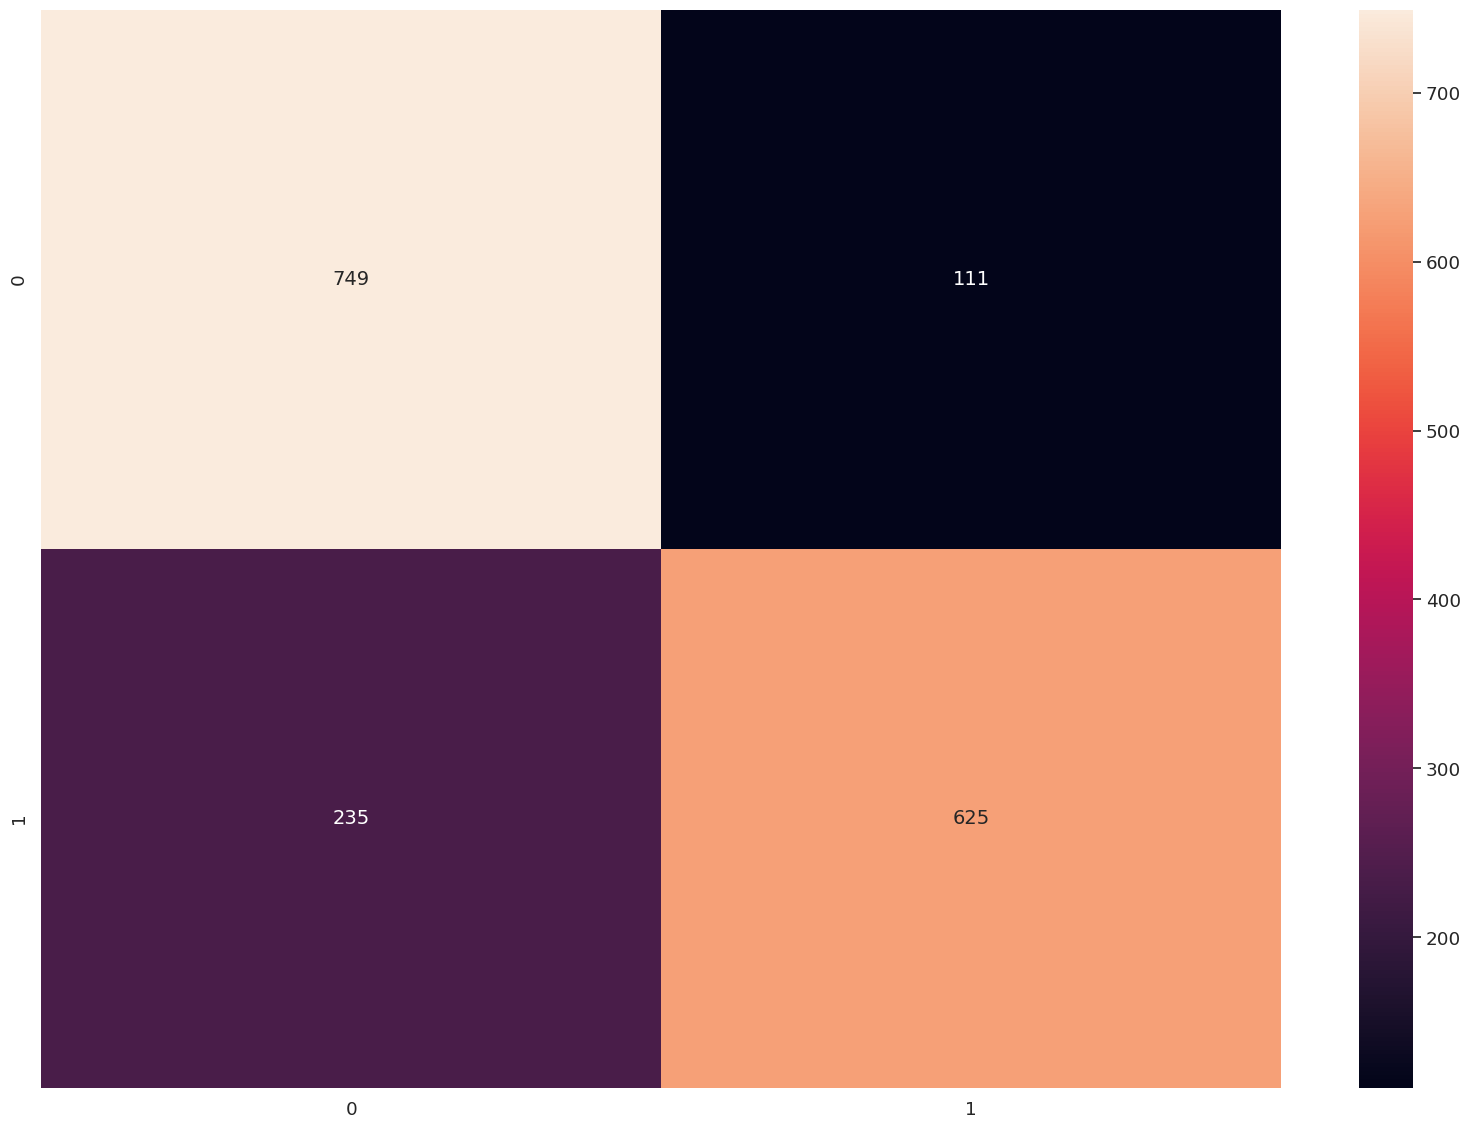

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=label, digits=4))

              precision    recall  f1-score   support

         neg     0.7612    0.8709    0.8124       860
         pos     0.8492    0.7267    0.7832       860

    accuracy                         0.7988      1720
   macro avg     0.8052    0.7988    0.7978      1720
weighted avg     0.8052    0.7988    0.7978      1720

